<a href="https://colab.research.google.com/github/peterbabulik/synthetic/blob/main/1_n%2B1_growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda
Original data: b'Hello, Spiral Fractal! This is a test of error correction using GPU acceleration with 1/n+1 growth pattern.'
Decoded data: b'Hello, Spiral Fractal! This is a test of error correction using GPU acceleration with 1/n+1 growth pattern.'
Storage Capacity: 82 bytes (656 bits)
Execution time: 0.06 seconds


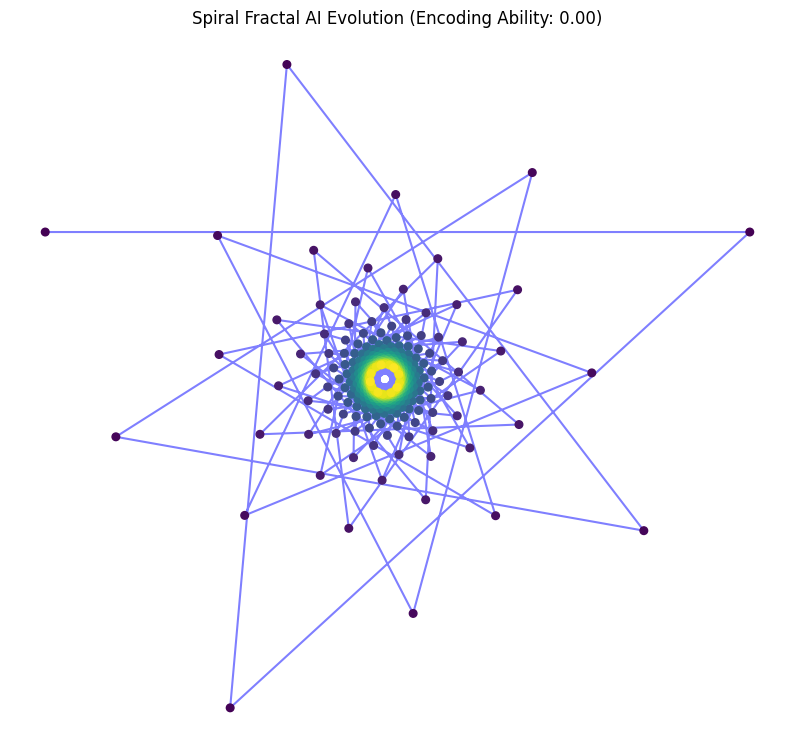

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
from google.colab import drive

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class SyntheticAI:
    def __init__(self):
        self.encoding_ability = torch.tensor([0.0], device=device)
        self.decoding_ability = torch.tensor([0.0], device=device)

    def train(self):
        self.encoding_ability += torch.rand(1, device=device) * 0.01
        self.decoding_ability += torch.rand(1, device=device) * 0.01

    def encode(self, data):
        return (data + self.encoding_ability) % 256

    def decode(self, encoded_data):
        return (encoded_data - self.decoding_ability) % 256

def generate_spiral_fractal(iterations, growth_factor):
    points = [(0, 0)]
    angle = 0
    radius = 1

    for i in range(iterations):
        growth = 1 / (i + 2)  # This implements the 1/n+1 growth
        x = points[-1][0] + radius * growth * np.cos(angle)
        y = points[-1][1] + radius * growth * np.sin(angle)
        points.append((x, y))
        angle += 2 * np.pi * growth_factor
        radius += growth

    return points

def plot_spiral_fractal(points, ai):
    fig, ax = plt.subplots(figsize=(10, 10))
    x, y = zip(*points)

    # Plot lines
    ax.plot(x, y, '-', color='blue', alpha=0.5)

    # Plot points
    colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
    ax.scatter(x, y, c=colors, s=30, zorder=2)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(f"Spiral Fractal AI Evolution (Encoding Ability: {ai.encoding_ability.item():.2f})")
    return fig

def encode_data_with_error_correction(data, points, ai):
    data_tensor = torch.tensor([int(b) for b in data], dtype=torch.float32, device=device)
    encoded_data = []
    chunk_size = 3  # Store each byte 3 times for redundancy
    for i in range(0, len(data_tensor), chunk_size):
        chunk = data_tensor[i:i+chunk_size]
        for byte in chunk:
            if len(encoded_data) < len(points):
                encoded_value = ai.encode(byte)
                encoded_data.extend([(points[len(encoded_data)], encoded_value)] * 3)  # Store 3 times
    return encoded_data

def decode_data_with_error_correction(encoded_data, ai):
    decoded_data = []
    chunk_size = 3
    for i in range(0, len(encoded_data), chunk_size * 3):
        chunk = encoded_data[i:i+chunk_size*3]

        # Decode each byte (taking average of 3 repetitions)
        for j in range(0, len(chunk), 3):
            byte_values = [ai.decode(chunk[j+k][1]).item() for k in range(3) if j+k < len(chunk)]
            decoded_byte = int(sum(byte_values) / len(byte_values))
            decoded_data.append(decoded_byte)

    return bytes(decoded_data)

def calculate_storage_capacity(points):
    total_points = len(points)
    usable_points = total_points * 3 // 4  # 1/4 of points used for error correction
    byte_capacity = usable_points // 3  # Each byte stored 3 times
    bit_capacity = byte_capacity * 8

    return byte_capacity, bit_capacity

def main():
    iterations = 328  # Increased for more storage capacity
    growth_factor = 0.618  # Golden ratio, can be adjusted

    start_time = time.time()

    ai = SyntheticAI()
    points = generate_spiral_fractal(iterations, growth_factor)

    fig = plot_spiral_fractal(points, ai)

    byte_capacity, bit_capacity = calculate_storage_capacity(points)

    sample_data = b"Hello, Spiral Fractal! This is a test of error correction using GPU acceleration with 1/n+1 growth pattern."
    encoded_data = encode_data_with_error_correction(sample_data, points, ai)
    decoded_data = decode_data_with_error_correction(encoded_data, ai)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Original data: {sample_data}")
    print(f"Decoded data: {decoded_data}")
    print(f"Storage Capacity: {byte_capacity} bytes ({bit_capacity} bits)")
    print(f"Execution time: {execution_time:.2f} seconds")

    plt.show()

if __name__ == "__main__":
    main()

# To run this code, execute this cell in a GPU-enabled Colab notebook.